EOF
Execution time:  42.341 seconds.
Top-148 in CMS-8*512
Top_dict with 18416 bytes.
Sketch with 16960 bytes.
Total size 34.546875 bytes, 

For copy
Top-148
Top_dict with 17.984375 kbytes.
Find 0.865 of Heavy Hitters
Execution time:  42.341 seconds.
Find:128
Top_ARE: 2.9791
Top_AAE: 1376.5547
Estimate time:  0.698 seconds.


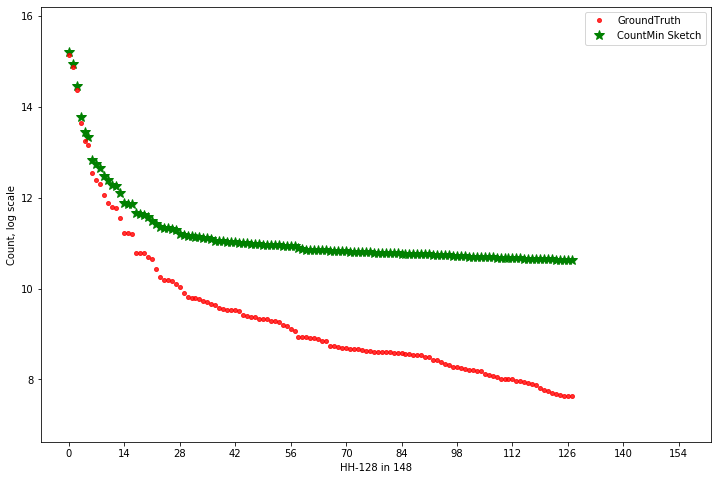

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [1]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=512
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''



EOF
Execution time:  61.505 seconds.
Top-148 in CMS-8*2048
Top_dict with 17880 bytes.
Sketch with 66112 bytes.
Total size 82.0234375 bytes, 

For copy
Top-148
Top_dict with 17.4609375 kbytes.
Find 0.946 of Heavy Hitters
Execution time:  61.505 seconds.
Find:140
Top_ARE: 0.7308
Top_AAE: 312.1214
Estimate time:  1.179 seconds.


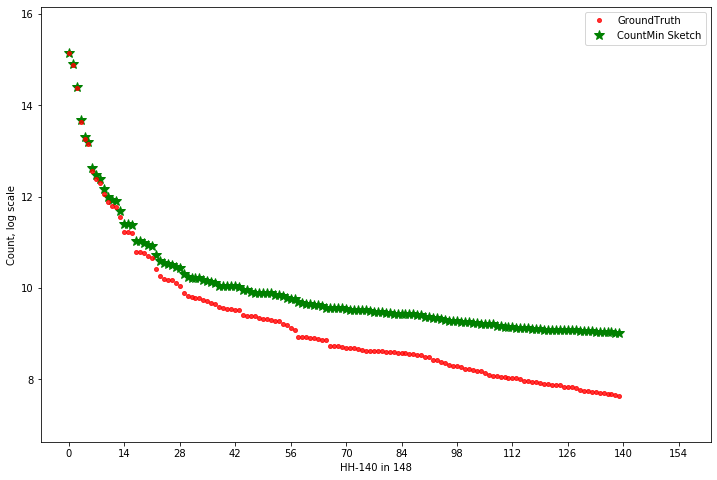

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [2]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=2048
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''



EOF
Execution time:  58.589 seconds.
Top-148 in CMS-8*5500
Top_dict with 17872 bytes.
Sketch with 176576 bytes.
Total size 189.890625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.973 of Heavy Hitters
Execution time:  58.589 seconds.
Find:144
Top_ARE: 0.2603
Top_AAE: 107.4653
Estimate time:  0.975 seconds.


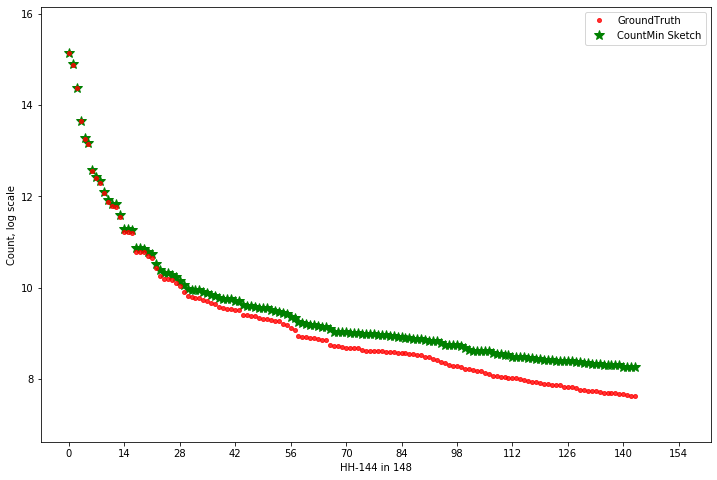

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [3]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=5500
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''



EOF
Execution time:  54.764 seconds.
Top-148 in CMS-8*8900
Top_dict with 17872 bytes.
Sketch with 285376 bytes.
Total size 296.140625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.980 of Heavy Hitters
Execution time:  54.764 seconds.
Find:145
Top_ARE: 0.1543
Top_AAE: 63.7172
Estimate time:  0.705 seconds.


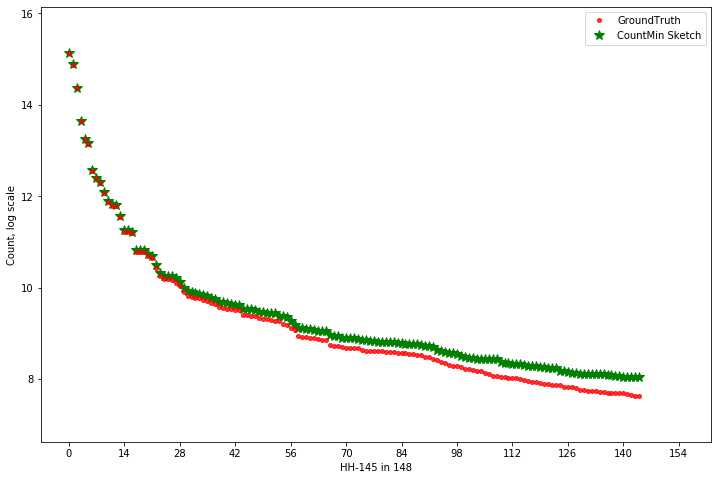

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [4]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=8900
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''



EOF
Execution time:  43.894 seconds.
Top-148 in CMS-8*12300
Top_dict with 17872 bytes.
Sketch with 394176 bytes.
Total size 402.390625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.980 of Heavy Hitters
Execution time:  43.894 seconds.
Find:145
Top_ARE: 0.1059
Top_AAE: 43.6414
Estimate time:  0.705 seconds.


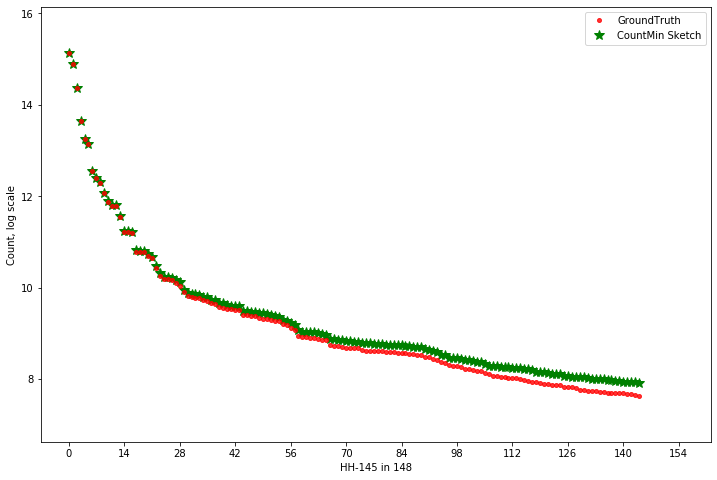

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [5]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=12300
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''



EOF
Execution time:  53.956 seconds.
Top-148 in CMS-8*19100
Top_dict with 17872 bytes.
Sketch with 611776 bytes.
Total size 614.890625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.980 of Heavy Hitters
Execution time:  53.956 seconds.
Find:145
Top_ARE: 0.0636
Top_AAE: 26.2897
Estimate time:  0.851 seconds.


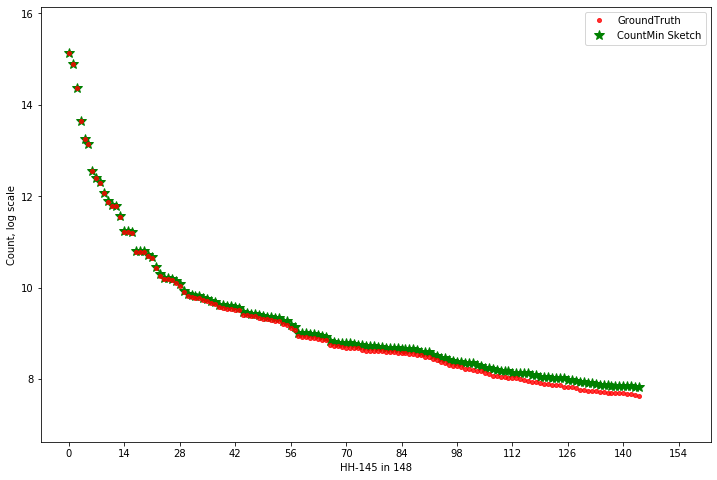

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [12]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=19100
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''


EOF
Execution time:  53.102 seconds.
Top-148 in CMS-8*22500
Top_dict with 17872 bytes.
Sketch with 720576 bytes.
Total size 721.140625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.986 of Heavy Hitters
Execution time:  53.102 seconds.
Find:146
Top_ARE: 0.0527
Top_AAE: 21.5137
Estimate time:  0.997 seconds.


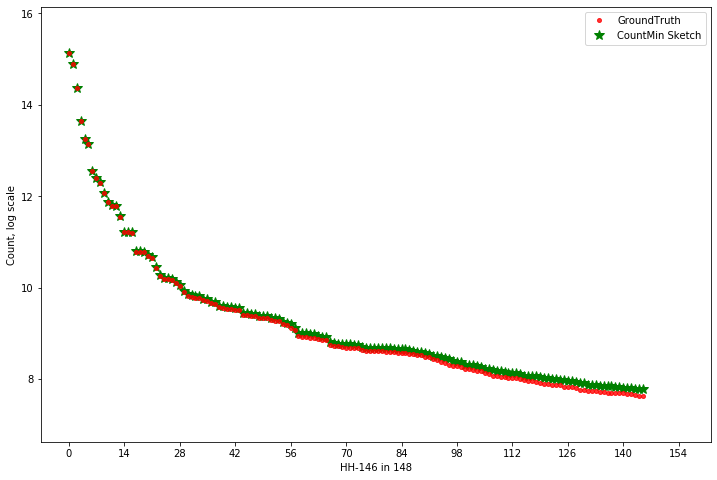

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [13]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=22500
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''


EOF
Execution time:  56.447 seconds.
Top-148 in CMS-8*25900
Top_dict with 17880 bytes.
Sketch with 829376 bytes.
Total size 827.3984375 bytes, 

For copy
Top-148
Top_dict with 17.4609375 kbytes.
Find 0.986 of Heavy Hitters
Execution time:  56.447 seconds.
Find:146
Top_ARE: 0.0468
Top_AAE: 18.7192
Estimate time:  0.797 seconds.


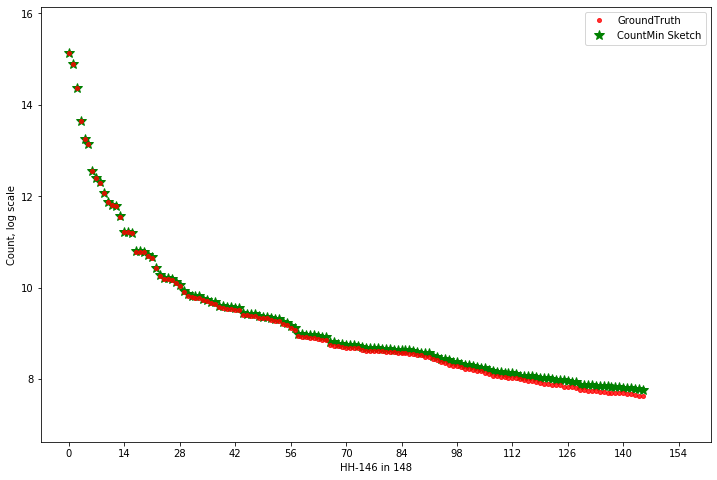

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [14]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=25900
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''


EOF
Execution time:  57.710 seconds.
Top-148 in CMS-8*29300
Top_dict with 17872 bytes.
Sketch with 938176 bytes.
Total size 933.640625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.986 of Heavy Hitters
Execution time:  57.710 seconds.
Find:146
Top_ARE: 0.0382
Top_AAE: 15.6370
Estimate time:  1.035 seconds.


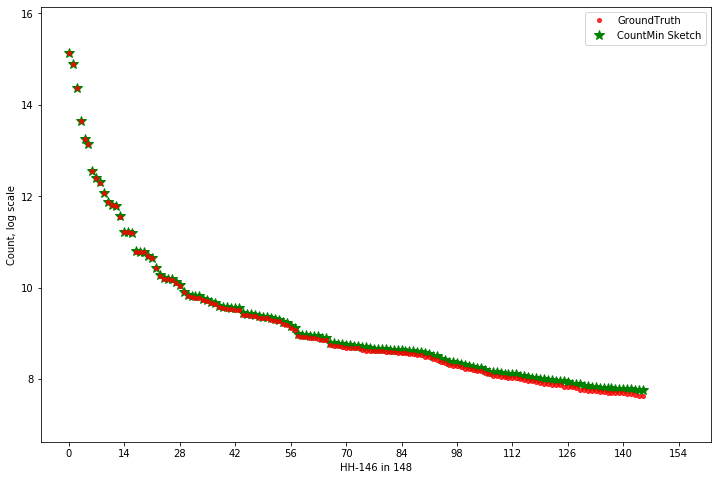

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [15]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=29300
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''


EOF
Execution time:  51.412 seconds.
Top-148 in CMS-8*32700
Top_dict with 17872 bytes.
Sketch with 1046976 bytes.
Total size 1039.890625 bytes, 

For copy
Top-148
Top_dict with 17.453125 kbytes.
Find 0.980 of Heavy Hitters
Execution time:  51.412 seconds.
Find:145
Top_ARE: 0.0330
Top_AAE: 13.7586
Estimate time:  0.723 seconds.


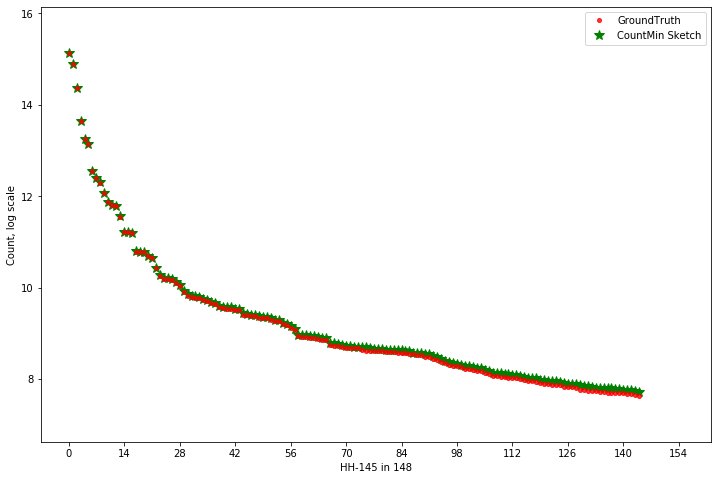

'\n# result to csv\nimport pandas as pd\npath="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n# Top_dict to csv\nfilename=\'CM_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n'

In [16]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=32700
d=8
size=148
topk=148
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

'''
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

'''
